In [ ]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [ ]:

from PIL import Image

#Cargamos imágenes
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/datasetes')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image=Image.open(filepath)
            new_img = image.resize((100,100))#Redimencionamos todas las imagenes a un mismo tamaño
            new_img.save('s.png','png')#Las guardamos
            image = plt.imread('s.png')#Las leemos pero ahora para convertirlas en arrays
            
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirectorios:',sum(dircount))

leyendo imagenes de  /content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/datasetes/
/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/datasetes/Randeep_Hooda 1
/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/datasetes/Rani_Mukerji 74
/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/datasetes/Ranveer_Singh 83
/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/datasetes/Richa_Chadda 95
/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/datasetes/Riteish_Deshmukh 82
/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/datasetes/Saif_Ali_Khan 63
/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/datasetes/Salman_Khan 68
/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/datasetes/Sanjay_Dutt 94
/content/drive/MyDrive/archive.zip (Unzipped Files)/Detección de rostros/datasetes/Sara_A

In [ ]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  2554


In [ ]:
personas=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    personas.append(name[len(name)-1])
    indice=indice+1

0 Randeep_Hooda
1 Shruti_Haasan
2 Shreyas_Talpade
3 Shraddha_Kapoor
4 Shilpa_Shetty
5 Shahid_Kapoor
6 Shah_Rukh_Khan
7 Sara_Ali_Khan
8 Sanjay_Dutt
9 Vicky_Kaushal
10 Varun_Dhawan
11 Vaani_Kapoor
12 Uday_Chopra
13 Tusshar_Kapoor
14 Tiger_Shroff
15 Tamannaah_Bhatia
16 Tabu
17 Taapsee_Pannu
18 Sushant_Singh_Rajput
19 Sunny_Deol
20 Suniel_Shetty
21 Sonam_Kapoor
22 Sonakshi_Sinha
23 Sidharth_Malhotra
24 Zareen_Khan
25 Yami_Gautam
26 Vivek_Oberoi
27 Vidya_Balan
28 Saif_Ali_Khan
29 Riteish_Deshmukh
30 Salman_Khan


In [ ]:
y = np.array(labels)
X = np.array(images) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)

print('Output classes : ', classes)

Total number of outputs :  31
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


In [ ]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.1)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (2298, 100, 100, 3) (2298,)
Testing data shape :  (256, 100, 100, 3) (256,)


Text(0.5, 1.0, 'Ground Truth : 7')

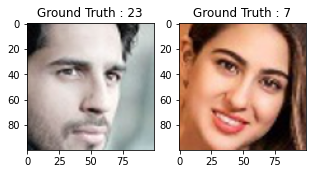

In [ ]:

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 23
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(1838, 100, 100, 3) (460, 100, 100, 3) (1838, 31) (460, 31)


In [ ]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 0.005 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 15 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 32 # cantidad de imágenes que se toman a la vez en memoria

In [ ]:
flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',padding='same',input_shape=(100,100,3)))
flower_model.add(MaxPooling2D((2, 2),padding='same'))

flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.25))

flower_model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.25))

flower_model.add(Flatten())
flower_model.add(Dense(256, activation='relu'))
flower_model.add(Dropout(0.25))

flower_model.add(Dense(nClasses, activation='softmax'))

In [ ]:
flower_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer='Adam',
                     metrics=['accuracy'])

In [ ]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/15
58/58 [==============================] - 31s 527ms/step - loss: 0.4586 - accuracy: 0.8477 - val_loss: 2.3125 - val_accuracy: 0.4478
Epoch 2/15
58/58 [==============================] - 31s 528ms/step - loss: 0.3756 - accuracy: 0.8836 - val_loss: 2.3577 - val_accuracy: 0.5043
Epoch 3/15
58/58 [==============================] - 31s 528ms/step - loss: 0.3360 - accuracy: 0.8939 - val_loss: 2.5621 - val_accuracy: 0.4826
Epoch 4/15
58/58 [==============================] - 31s 527ms/step - loss: 0.3066 - accuracy: 0.9059 - val_loss: 2.4843 - val_accuracy: 0.4804
Epoch 5/15
58/58 [==============================] - 31s 530ms/step - loss: 0.2784 - accuracy: 0.9146 - val_loss: 2.5525 - val_accuracy: 0.4804
Epoch 6/15
58/58 [==============================] - 31s 530ms/step - loss: 0.2819 - accuracy: 0.9075 - val_loss: 2.7177 - val_accuracy: 0.4804
Epoch 7/15
58/58 [==============================] - 31s 529ms/step - loss: 0.2654 - accuracy: 0.9091 - val_loss: 2.4756 - val_accuracy: 0.5152

In [ ]:
test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

8/8 [==============================] - 1s 146ms/step - loss: 3.0162 - accuracy: 0.5234
